$\frac{GN}{A} = \epsilon A^{\frac{H}{2}}$

$GN = \epsilon A^{\frac{H+2}{2}}$

$A^{\frac{H+2}{2}} = \frac{G}{\epsilon}N$

$\alpha := \frac{2}{H+2}, \ a := (\frac{G}{\epsilon})^\alpha$

$A = aN^\alpha$


$A_{n}(N) \sim Nd = A^{1/2}N^{1/2}$ where $d$ is the average distance between individuals $d = (A/N)^{1/2}$

$A_{n} = l a^{1/2} N^{\alpha/2} N^{1/2} = l a^{1/2} N^{\frac{\alpha + 1}{2}} = a_{0} N^{1-\delta}$ where $\delta=\frac{H}{2(H+2)}, a_{0}=l a^{1 / 2}$

$k_{s}(N)=b\left[1+s b+(s b)^{2}+\ldots\right]=b \frac{1-r^{h}}{1-r}$

$k_s(N) = b\frac{(sb)^{h}-1}{sb -1} \approx s^{h}b^h = s^{h}N$

Since the city population, $N$, is proportional to the total infrastructure network area, $A_n$ times the average connectivity of a typical person, $k_s(N)$, and since $h = \log_{b} N$, we obtain

$A_n \sim \frac{N}{k_s(N)} = s^{-h} = s^{- \log_{b} N} = N^{- \log_{b} s} = N^{\theta}$

where $\theta=\left|\frac{\ln s}{\ln b}\right|$. We remember also that $A_n = a_0N^{1-\delta} \sim N^{1-\delta}$, we obtain
$A_n \sim N^{1-\delta + \theta}$

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_white
import scipy as sp
import seaborn as sns
from statsmodels.compat import lzip

In [2]:
# load the data
data = pd.read_csv("data/Medieval_cities.csv", encoding = "ISO-8859-1", header=0, index_col=0)
data.head()

,Settlement,Pop,Area,latitude,longitude,UrbanSytem
S2 Number,,,,,,
1,London & Southwark,70000,330.0,51.503841,-0.094796,England
2,York,22700,135.0,53.959965,-1.087298,England
3,Bristol,14400,130.0,51.454513,-2.587910,England
4,Lincoln,12300,115.0,53.230688,-0.540579,England
5,Norwich,14000,185.0,52.630886,1.297355,England


In [3]:
# correct the UrbanSytem column name
data.columns = ['Settlement', 'Pop', 'Area', 'latitude', 'longitude', 'UrbanSystem']
data["UrbSys"] = data.UrbanSystem.astype("category").cat.codes
data.head()

,Settlement,Pop,Area,latitude,longitude,UrbanSystem,UrbSys
S2 Number,,,,,,,
1,London & Southwark,70000,330.0,51.503841,-0.094796,England,0
2,York,22700,135.0,53.959965,-1.087298,England,0
3,Bristol,14400,130.0,51.454513,-2.587910,England,0
4,Lincoln,12300,115.0,53.230688,-0.540579,England,0
5,Norwich,14000,185.0,52.630886,1.297355,England,0


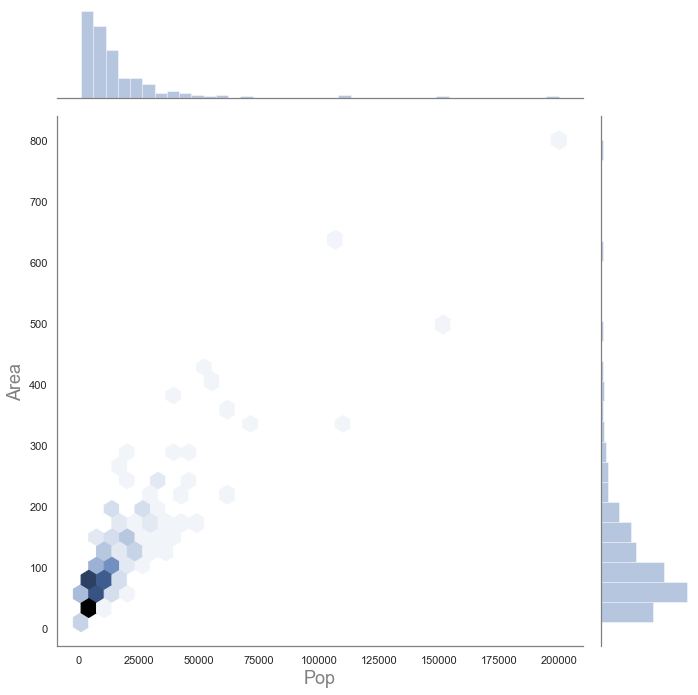

In [7]:
# make a joint plot of Pop and Area
rc={'axes.labelsize': 18, 'font.size': 18, 'legend.fontsize': 18.0, 'axes.titlesize': 18, 'axes.edgecolor': '.5', \
   'axes.labelcolor': '.5'}
sns.set(style="white", color_codes=True, rc=rc)
#sns.set(rc=rc)
sns.set_context(rc=rc)
g = sns.jointplot(x="Pop", y="Area", height=10, data=data, kind="hex")
plt.tick_params(axis='x', colors='slategrey')
plt.tick_params(axis='y', colors='slategrey')
plt.savefig('Medieval/joint_plot.jpg', dpi=120)

In [8]:
# create two new variables from the natural logarithm of Pop and Area
data["logPop"] = np.log(data.Pop)
data["logArea"] = np.log(data.Area)
data.head()

,Settlement,Pop,Area,latitude,longitude,UrbanSystem,UrbSys,logPop,logArea
S2 Number,,,,,,,,,
1,London & Southwark,70000,330.0,51.503841,-0.094796,England,0,11.156251,5.799093
2,York,22700,135.0,53.959965,-1.087298,England,0,10.030120,4.905275
3,Bristol,14400,130.0,51.454513,-2.587910,England,0,9.574983,4.867534
4,Lincoln,12300,115.0,53.230688,-0.540579,England,0,9.417355,4.744932
5,Norwich,14000,185.0,52.630886,1.297355,England,0,9.546813,5.220356


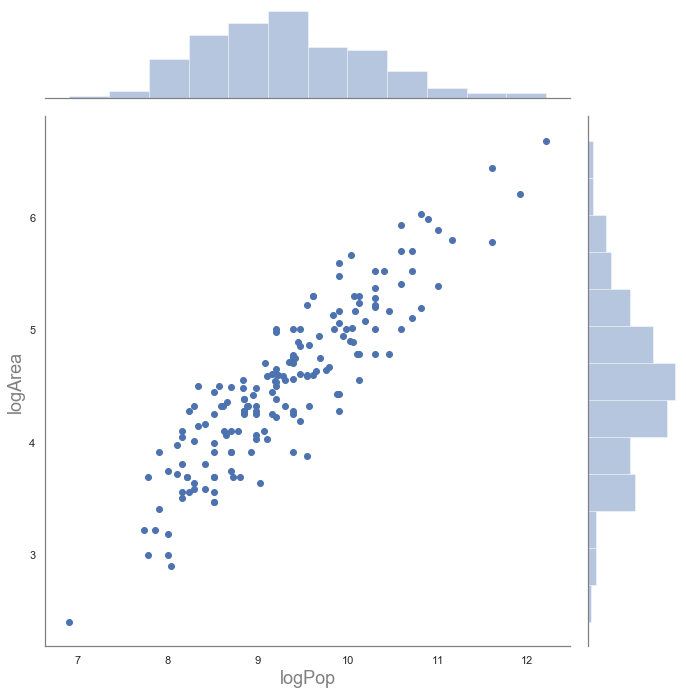

In [10]:
# make joint plot
g = sns.jointplot(x="logPop", y="logArea", height=10, data=data)
plt.tick_params(axis='x', colors='slategrey')
plt.tick_params(axis='y', colors='slategrey')
plt.savefig('Medieval/joint_plot_log.jpg', dpi=120)

In [11]:
# create array with the four urban systems
regions = np.unique(data['UrbanSystem'])
regions

array(['England', 'France & Belgium', 'Germany', 'N. Italy'], dtype=object)

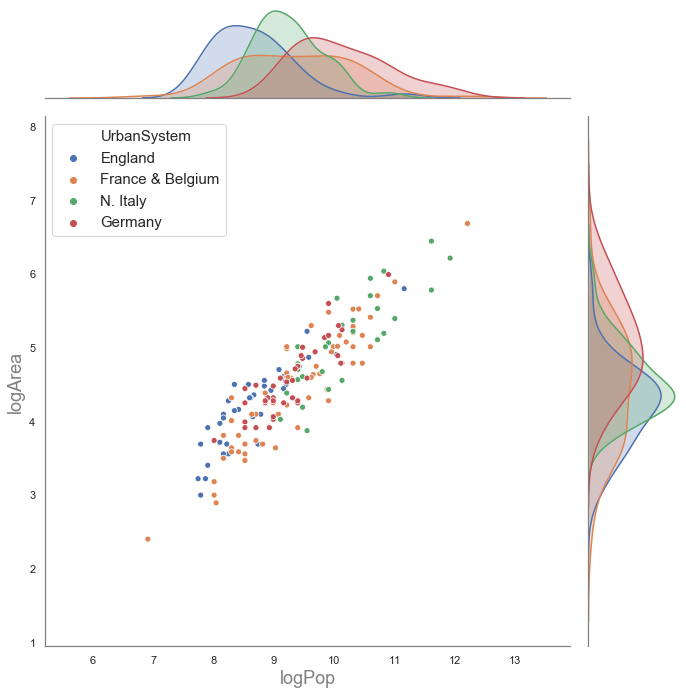

In [12]:
# make joint plot broken down by urban system
grid = sns.JointGrid(x='logPop', y='logArea', data=data, height=10)
g = grid.plot_joint(sns.scatterplot, hue='UrbanSystem', data=data)
g.ax_joint.legend(prop={'size':15},loc='upper left')
for region in regions:
    sns.kdeplot(data.loc[data['UrbanSystem']==region, 'logPop'], ax=g.ax_marg_x,\
                 shade=True, legend=False)
    sns.kdeplot(data.loc[data['UrbanSystem']==region, 'logArea'], ax=g.ax_marg_y,\
                 vertical=True, shade=True, legend=False)
plt.savefig('Medieval/joint_plot_by_urb_sys.jpg', dpi=120)

In [13]:
# begin creating the OLS regression matrices
X = np.array(data.logPop)
X = sm.add_constant(X)
y = np.array(data.logArea)

In [14]:
# make and fit model
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     729.5
Date:                Thu, 02 Jul 2020   Prob (F-statistic):           1.38e-63
Time:                        17:16:00   Log-Likelihood:                -44.194
No. Observations:                 173   AIC:                             92.39
Df Residuals:                     171   BIC:                             98.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1252      0.247     -8.603      0.0

In [15]:
# make array for out-of-sample prediction
x_pred = np.linspace(data.logPop.min(), data.logPop.max(), 50)
x_pred2 = sm.add_constant(x_pred)
y_pred = olsres.predict(x_pred2)

In [16]:
# print estimated parameters
print(olsres.params) 

[-2.12520413  0.71409966]


In [17]:
ypred = olsres.predict(X)
print(ypred)

[5.8414706  5.03730132 4.71228835 4.59972557 4.69217153 4.44471988
 4.43747008 4.4152683  4.36061105 4.26525633 4.21731218 4.19719537
 4.18692037 4.18692037 4.4152683  4.14427489 3.7022192  4.11053162
 4.06290733 4.05048789 4.02498162 4.01187851 3.99853046 3.88168275
 3.83241496 3.83241496 3.7609454  3.7609454  3.74190161 3.74190161
 3.7022192  3.7022192  3.66020122 3.66020122 3.51690234 3.51690234
 3.48995198 3.43279351 3.43279351 3.40240171 6.59114823 5.44184916
 5.00512923 4.94687299 4.76485452 5.10621973 4.45189682 4.35244983
 3.95692065 4.45189682 2.80762158 5.73139166 5.52595798 5.34649444
 5.23641549 5.34649444 4.45189682 4.58209258 4.98171403 5.23641549
 5.23641549 4.74143932 4.71228835 4.45189682 5.07706875 3.95692065
 4.80079165 4.74143932 5.30447646 5.23641549 4.50021184 4.29255009
 4.08711642 3.95692065 3.95692065 3.79757392 3.88168275 3.79757392
 3.7022192  5.44184916 5.23641549 5.05285967 4.74143932 4.92879355
 4.16591593 4.08711642 4.03784863 3.79757392 3.61555545 4.4518

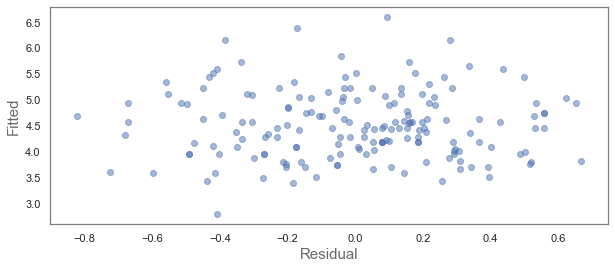

In [19]:
# make residual plot
pred_val = olsres.fittedvalues.copy()
true_val = data['logArea'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(10,4))
_ = ax.scatter(residual, pred_val, alpha=0.5)
plt.xlabel('Residual', size=15, color='dimgrey')
plt.ylabel('Fitted', size=15, color='dimgrey')
plt.savefig('Medieval/residual_plot.jpg', dpi=120)
plt.show()

In [20]:
# Breusch Pagan heteroskedasticity test
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = statsmodels.stats.diagnostic.het_breuschpagan(olsres.resid, olsres.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 0.21325301862699642),
 ('p-value', 0.6442295818985815),
 ('f-value', 0.21104781947858983),
 ('f p-value', 0.6465308506664842)]

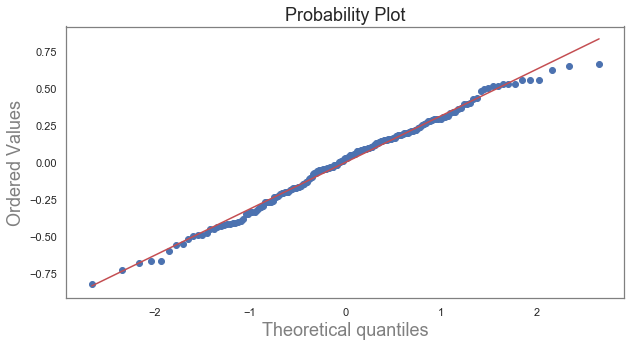

In [22]:
# make qq plot
fig, ax = plt.subplots(figsize=(10,5))
_, (__, ___, r) = sp.stats.probplot(olsres.resid, plot=ax, fit=True)
plt.savefig('Medieval/qq_plot_all.jpg', dpi=120)

In [23]:
# run regression for each urban system
models = {}
for region in regions:
    df = data[data.UrbanSystem == region]
    X = np.array(df.logPop)
    X = sm.add_constant(X)
    y = np.array(df.logArea)
    olsmod = sm.OLS(y, X)
    olsres = olsmod.fit()
    models[region] = olsres
    print(round(olsres.params[1],3))

0.73
0.79
0.754
0.72


In [24]:
print('Breusch–Pagan test p-values: ')
for region, model in models.items():
    test = statsmodels.stats.diagnostic.het_breuschpagan(model.resid, model.model.exog)
    print(region, round(test[1],3))

Breusch–Pagan test p-values: 
England 0.125
France & Belgium 0.775
Germany 0.46
N. Italy 0.985


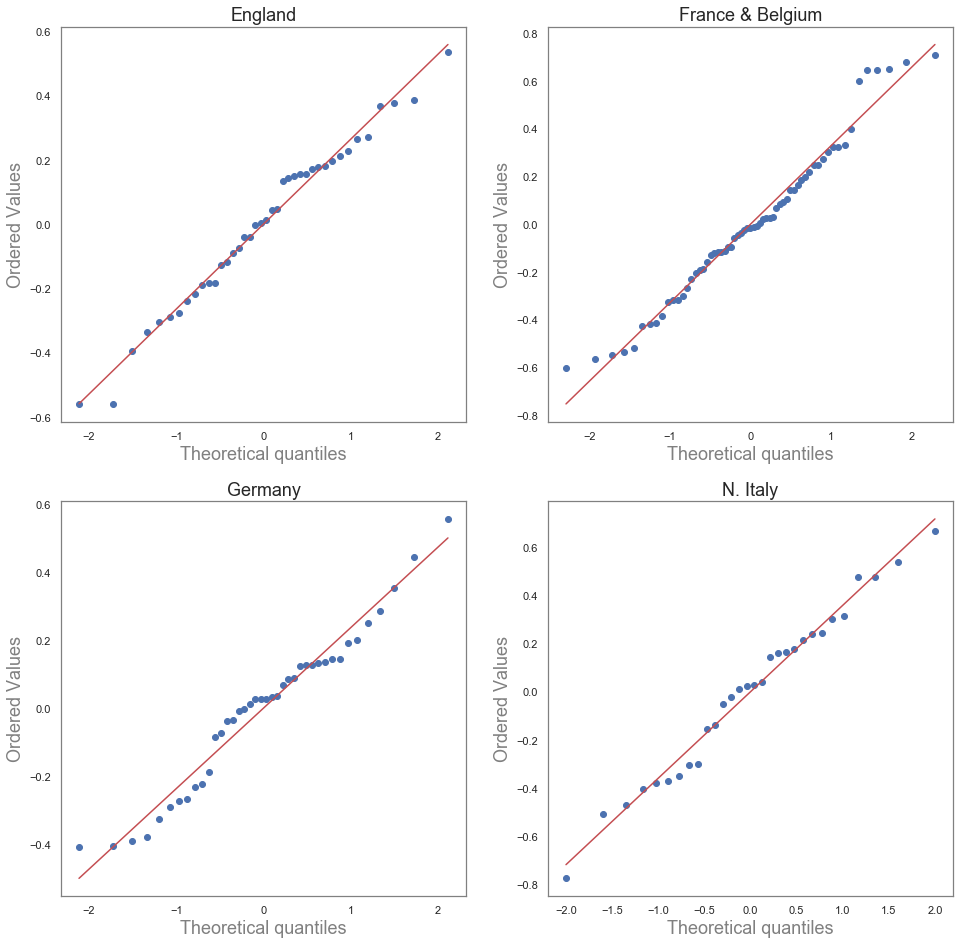

In [25]:
# make qq plots for each urban system
fig = plt.figure(figsize=(16,16))
for region, model in models.items():
    i = np.where(regions==region)[0].item()
    ax = fig.add_subplot(2,2,i+1)
    _, (__, ___, r) = sp.stats.probplot(model.resid, plot=ax, fit=True)
    ax.set_title(region)
plt.savefig('Medieval/qq_plot_by_urb_sys.jpg', dpi=120)

In [26]:
# print exponents for each urban system
alphas = {}
for region, model in models.items():
    alphas[region] = round(model.params[1],3)
    
print(alphas)

{'England': 0.73, 'France & Belgium': 0.79, 'Germany': 0.754, 'N. Italy': 0.72}


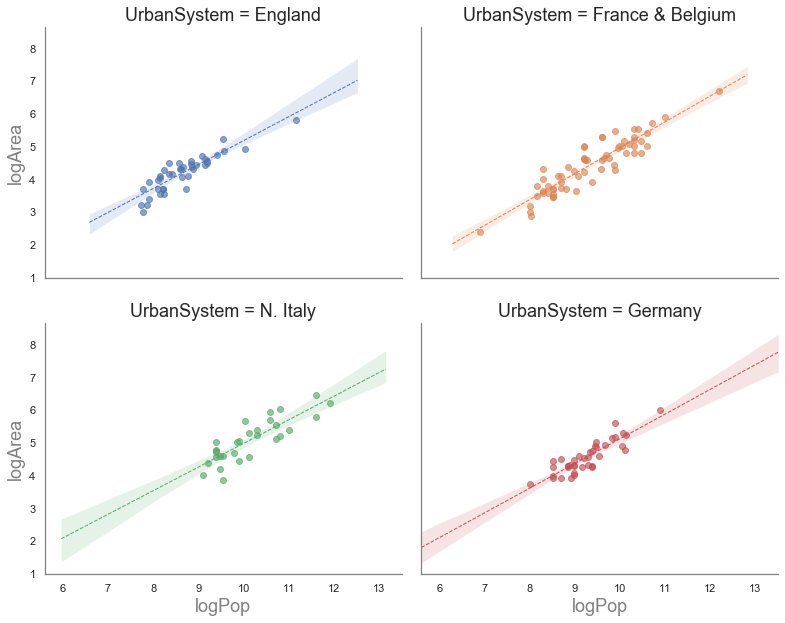

In [27]:
# regression plots
lm = sns.lmplot(x='logPop',y='logArea',data=data,fit_reg=True, height=4.5,col='UrbanSystem', hue = 'UrbanSystem',\
                col_wrap=2, aspect=1.25, scatter_kws={'alpha':0.65}, line_kws={"lw":1, 'ls':'--'}) 
lm = (g.set_axis_labels("Log Population", "Log Area")
      .fig.subplots_adjust(wspace=.02))
plt.savefig('Medieval/regression_plots.jpg', dpi=120)
plt.show()